This notebook showcases Turkish-Ottoman Makam (M)usic Analysis TOolbox ([tomato](https://github.com/sertansenturk/tomato)), a computational analysis library built for makam music. 



The toolbox has been realized as part of the thesis:
    
    Şentürk, S. (2016). Computational analysis of audio recordings and music scores for the description and discovery of Ottoman-Turkish makam music. Ph.D. thesis, Universitat Pompeu Fabra, Barcelona, Spain.

The notebook demostrates the analysis capabilities of `tomato` in 3 parts:

1. Extract predominant melody and pitch distribution from a short segment of Egyptian music
2. Extract all available audio features from a Turkish makam music recording
3. Joint audio-score analysis applied to the same Turkish makam music recording

In [1]:
import copy
import os

import IPython
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

from tomato.audio.audioanalyzer import AudioAnalyzer
from tomato.symbolic.symbtranalyzer import SymbTrAnalyzer
from tomato.joint.jointanalyzer import JointAnalyzer

# Audio analysis on a short segment of Egyptian music

Below we analyze a short audio segment sliced from [a performance of أم كلثوم (Umm Kulthum)](https://youtu.be/Zz2NsoNEdp4?t=602).

In [2]:
short_audio_file = os.path.join("data", "Zingibar.wav")
IPython.display.Audio(short_audio_file)

## Analyze audio segment

`tomato` comes up with implementations of numerous audio analysis methods. Instead, you can use call each method individually using the high-level `AudioAnalyzer` API.

Below we extract a few features of interest, namely:

- Predominant melody
- Pitch distribution
- Pitch class distribution

We also extract the *stable pitches* performed in the audio by detecting the peaks of the pitch class distribution.

In [3]:
audio_analyzer = AudioAnalyzer()

# pitch/predominant melody extraction
predominant_melody = audio_analyzer.extract_pitch(short_audio_file)
predominant_melody = audio_analyzer.filter_pitch(predominant_melody)

# pitch and pitch-class distribution computation
pitch_distribution = audio_analyzer.compute_pitch_distribution(predominant_melody)

pitch_class_distribution = copy.deepcopy(pitch_distribution)
pitch_class_distribution.to_pcd()

# stable pitches
stable_pitches = pitch_distribution.bins[pitch_distribution.detect_peaks()[0]]

## Plot features

Below we plot the predominant melody and pitch distribution side by side.

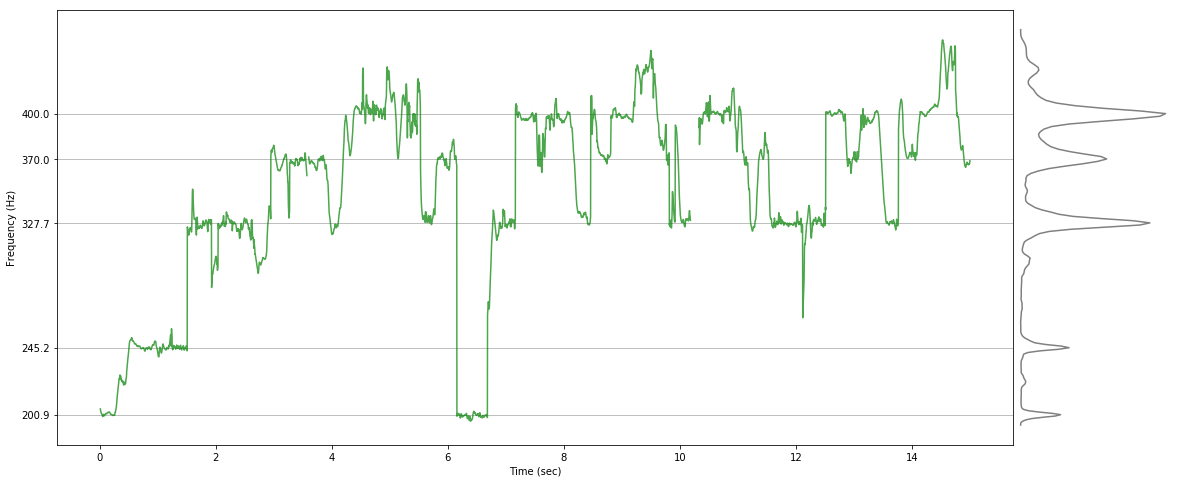

In [4]:
plt.rcParams['figure.figsize'] = [20, 8]

# create figure
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1])
ax1 = fig.add_subplot(gs[0])  # pitch
ax2 = fig.add_subplot(gs[1], sharey=ax1)  # pitch distribution
fig.subplots_adjust(hspace=0, wspace=0)

# plot pitch
pitch = np.array(predominant_melody['pitch'])
pitch[pitch[:, 1] == 0, 1] = np.nan
ax1.plot(pitch[:, 0], pitch[:, 1], 'g', label='Pitch', alpha=0.7)

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Frequency (Hz)')
ax1.yaxis.grid(True)

# plot pitch distribution
ax2.plot(pitch_distribution.vals, pitch_distribution.bins, color='gray')
ax2.set_yticks(stable_pitches)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axis('off')

plt.show()

# Audio analysis on a Turkish makam music recording

Below we analyze a classical Turkish makam music recording ([MusicBrainz URL](https://musicbrainz.org/recording/f970f1e0-0be9-4914-8302-709a0eac088e)). In particular, we extract the features below:

- Predominant Melody
- Tonic
- Transposition
- Pitch Distribution
- Pitch Class Distribution
- Makam
- Melodic Progression
- Note intervals


In [5]:
audio_file = os.path.join("data",
                          "ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede",
                          "f970f1e0-0be9-4914-8302-709a0eac088e.mp3")
IPython.display.Audio(audio_file)


## Audio analysis

We can compute all the aforementioned features with a single line of code.

In [6]:
audio_features = audio_analyzer.analyze(audio_file)


/opt/conda/lib/python3.7/site-packages/json_tricks/nonp.py:223: JsonTricksDeprecation: `json_tricks.load(s)` stripped some comments, but `ignore_comments` was not passed; in the next major release, the behaviour when `ignore_comments` is not passed will change; it is recommended to explicitly pass `ignore_comments=True` if you want to strip comments; see https://github.com/mverleg/pyjson_tricks/issues/74
  JsonTricksDeprecation)


## Plot features

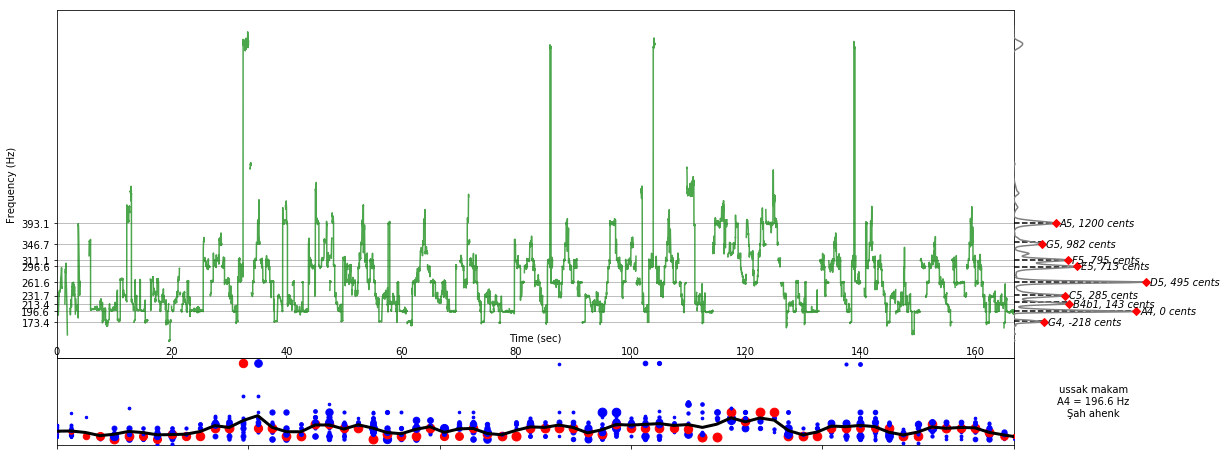

In [7]:
audio_analyzer.plot(audio_features)
plt.show()


# Joint audio-score analysis

In this section, we analyze the audio recording in Section 1 jointly with a score of the composition performed in the recording. 


In [8]:
score_file = os.path.join("data",
                          "ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede",
                          "ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt")

## Prequisite: Score analysis

tomato is able to read and analyze a score format called [SymbTr](https://github.com/MTG/SymbTr). 

In [9]:
score_analyzer = SymbTrAnalyzer()
score_features = score_analyzer.analyze(score_file)

display(score_features['metadata'])

{'makam': {'mb_attribute': 'Uşşak',
  'attribute_key': 'ussak',
  'source': 'http://musicbrainz.org/work/e7924b0d-c8a0-4b4a-b253-8eec898eac1e',
  'symbtr_slug': 'ussak'},
 'form': {'mb_attribute': 'Sazsemaisi',
  'attribute_key': 'sazsemaisi',
  'source': 'http://musicbrainz.org/work/e7924b0d-c8a0-4b4a-b253-8eec898eac1e',
  'symbtr_slug': 'sazsemaisi'},
 'usul': {'mb_attribute': 'Aksaksemai',
  'attribute_key': 'aksaksemai',
  'source': 'http://musicbrainz.org/work/e7924b0d-c8a0-4b4a-b253-8eec898eac1e',
  'symbtr_slug': 'aksaksemai'},
 'composer': {'name': 'Neyzen Aziz Dede',
  'mbid': 'a6775723-69b6-4997-82da-bf230b1f8655',
  'symbtr_slug': 'neyzen_aziz_dede'},
 'lyricist': {},
 'url': 'http://musicbrainz.org/work/e7924b0d-c8a0-4b4a-b253-8eec898eac1e',
 'language': 'zxx',
 'recordings': [{'mbid': '9a7d391f-90a6-4f2d-a0d2-5e6a5365b149',
   'title': 'Uşşak Saz Semaisi'},
  {'mbid': '9b869a16-0ab0-43a2-a51e-2a03e9484e70',
   'title': 'Uşşak Saz Semaisi'},
  {'mbid': '86721a3a-268f-4422-8

## Score-Informed Audio Analysis

In [10]:
# joint analysis
joint_analyzer = JointAnalyzer()
joint_features, score_informed_audio_features = joint_analyzer.analyze(
    symbtr_txt_filename=score_file, 
    score_features=score_features,
    audio_filename=audio_file,
    audio_pitch=audio_features['pitch'])

# redo some steps in audio analysis
score_informed_audio_features = audio_analyzer.analyze(
    metadata=False, pitch=False, **score_informed_audio_features)

# get a summary of the analysis
summarized_features = joint_analyzer.summarize(
    audio_features={'pitch': audio_features['pitch']},
    score_features=score_features,
    joint_features=joint_features, 
    score_informed_audio_features=score_informed_audio_features)


/opt/conda/lib/python3.7/site-packages/tomato/joint/alignedpitchfilter.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p[1] for p in pitch_corrected
/opt/conda/lib/python3.7/site-packages/tomato/joint/alignednotemodel.py:141: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p for p in pitch
/opt/conda/lib/python3.7/site-packages/tomato/joint/alignednotemodel.py:154: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  temp_pitch_vals = np.hstack(nn for nn in note_trajectories)


## Plot features

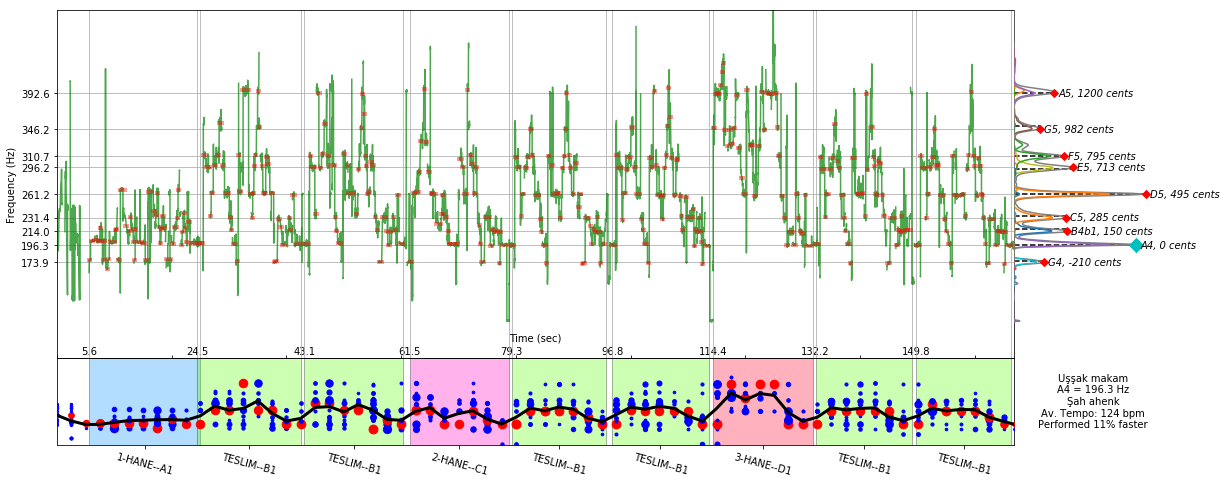

In [11]:
fig, ax = joint_analyzer.plot(summarized_features)
ax[0].set_ylim([50, 500])
plt.show()

You can access the analysis of the full audio recording and listen to audio interactively in Dunya ([link](https://dunya.compmusic.upf.edu/makam/recording/f970f1e0-0be9-4914-8302-709a0eac088e)).